The pathlib is a Python module which provides an object API for working with files and directories. The pathlib is a standard module. Path is the core object to work with files.

In [1]:
import tensorflow as tf


import pathlib

#We are going to use the flower dataset

dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)
#tf.keras.utils.get_file is used to download the files from the url. Untar = true means that the file should be decompressed.
data_dir = pathlib.Path(data_dir)
#we are creating a path object for data_dir and a directory is created with the flower photos

In [2]:
batch_size = 32
#This means that we are using 32 training examples used in one iteration

In [3]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  seed=123,
  image_size=(180, 180),
  batch_size=batch_size)

#Generates a tf.data.Dataset from image files in a directory.t

Found 3670 files belonging to 5 classes.


The tf.data.Dataset API supports writing descriptive and efficient input pipelines. Dataset usage follows a common pattern:

Create a source dataset from your input data.
Apply dataset transformations to preprocess the data.
Iterate over the dataset and process the elements.
Iteration happens in a streaming fashion, so the full dataset does not need to fit into memory.

In [4]:
model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255, input_shape=(180, 180, 3)),
  tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(5)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
epochs=10
history = model.fit(
  train_ds,
  epochs=epochs
)

Epoch 1/10
115/115 [==============================] - 43s 368ms/step - loss: 1.2869 - accuracy: 0.4471
Epoch 2/10
115/115 [==============================] - 45s 388ms/step - loss: 0.9646 - accuracy: 0.6139
Epoch 3/10
115/115 [==============================] - 44s 384ms/step - loss: 0.7792 - accuracy: 0.7019
Epoch 4/10
115/115 [==============================] - 42s 367ms/step - loss: 0.6183 - accuracy: 0.7736
Epoch 5/10
115/115 [==============================] - 43s 372ms/step - loss: 0.4148 - accuracy: 0.8572
Epoch 6/10
115/115 [==============================] - 43s 371ms/step - loss: 0.2618 - accuracy: 0.9098
Epoch 7/10
115/115 [==============================] - 43s 374ms/step - loss: 0.1721 - accuracy: 0.9447
Epoch 8/10
115/115 [==============================] - 44s 380ms/step - loss: 0.1006 - accuracy: 0.9708
Epoch 9/10
115/115 [==============================] - 44s 384ms/step - loss: 0.0675 - accuracy: 0.9823
Epoch 10/10
115/115 [==============================] - 44s 385ms/step - l

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

In [6]:
import numpy as np
from  matplotlib import pyplot as plt
from sklearn.manifold import TSNE

model2 = tf.keras.Model(inputs=model.input, outputs=model.layers[-2].output)
test_ds = np.concatenate(list(train_ds.take(5).map(lambda x, y : x))) # get five batches of images and convert to numpy array
features = model2(test_ds)
labels = np.argmax(model(test_ds), axis=-1)
tsne = TSNE(n_components=2).fit_transform(features)

C:\Users\Varun\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Varun\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [7]:
def scale_to_01_range(x):

    value_range = (np.max(x) - np.min(x))
    starts_from_zero = x - np.min(x)
    return starts_from_zero / value_range

In [8]:
tx = tsne[:, 0]
ty = tsne[:, 1]

tx = scale_to_01_range(tx)
ty = scale_to_01_range(ty)


['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


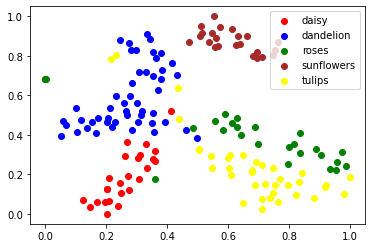

In [9]:
colors = ['red', 'blue', 'green', 'brown', 'yellow']
classes = train_ds.class_names
print(classes)
fig = plt.figure()
ax = fig.add_subplot(111)
for idx, c in enumerate(colors):
    indices = [i for i, l in enumerate(labels) if idx == l]
    current_tx = np.take(tx, indices)
    current_ty = np.take(ty, indices)
    ax.scatter(current_tx, current_ty, c=c, label=classes[idx])

ax.legend(loc='best')
plt.show()